# A Brief Tutorial on Artificial Neural Nets

Currently, artificial neural networks (ANNs) are one of the hottest topics in machine learning and some of the most widely used tools in data science. In the last years, they have achieved impressive performance in tasks traditionally elusive for artificial intelligence, such as image classification and speech recognition. In this notebook, we will briefly introduce the key ideas behind this learning approach, focusing on the so-called feed-forward arquitectures.  

<img width='800' height='100' align='left' src='figs/main.jpg'>


A great book for studying this topic is:

Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning (adaptive computation and machine learning series). Adaptive Computation and Machine Learning series, 800.

## Tools

For this activity, we will need a library specialized in deep learning called Keras. We will also use sklearn, a very complete library for machine learning in Python.  


<table align='left'>
<tr>
<td><img src='figs/keras_logo.png' width='450' height='200'/></td>
<td><img src='figs/scikit.png' width='450' height='200'/></td>
</tr>
</table>


Please refer to https://keras.io and http://scikit-learn.org/stable/ for help regarding installation and usage.

In addition, the following guide worked for me:

http://www.scholarinterviews.com/2017/09/how-to-install-tensorflow-in-anaconda3-on-windows10.html

Please be aware of the fact that the combination of Keras+Tensorflow+Pyhton3 seems to be instable. So I reccomend to work with Keras+Tensorflow+Python2.7 or Keras+Theano+Python2.7 or Keras+Theano+Python3.


## Problem & Dataset: Ragu or Carbonara?
In this lab, we will train a neural network to solve a critical task during our stay in Italy: distinguishing between types of pasta. To start we will consider only two classes: _pasta_ _al_ _ragu_ and _pasta_ _alla_ _carbonara_. As a homework, you will consider also _gnocchi_ and _lasagna_. If you have not yet tried one of these dishes, I absolutely recomend you to visit one of the fantastic _osterie_ in the town and exploit the opportunity to collect examples by yourself!
 

<table align='left'>
<tr>
<td><img src='figs/carbonara4.jpg' alt="Drawing" style="height: 400px;"/></td>
<td><img src='figs/ragu4.jpg' alt="Drawing" style="height: 400px;"/></td>
</tr>
</table>



We will extract images from the _Food_-_101_ dataset, a collection of 101.000 food images organized in 101 categories,  maintained by collegues of the ETH Zurich and available at https://www.vision.ee.ethz.ch/datasets_extra/food-101/. The images contain some amount of noise and sometimes wrong labels. All images are RGB and have been rescaled to have a maximum side length of 512 pixels, but are of variable width and length.

To start, verify that you have the folders required for this lab:

food/spaghetti_bolognese <br>
food/spaghetti_carbonara <br>
food/gnocchi <br>
food/lasagna <br>

If you do not have the dataset in your computer, you can download the required folders from

http://octopus.inf.utfsm.cl/~ricky/food.tar.gz


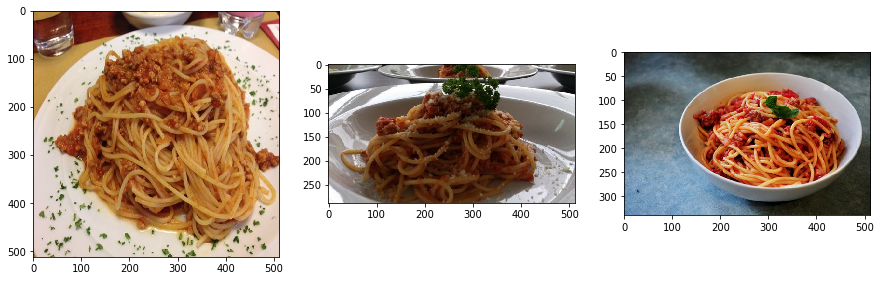

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

root_dir = 'food/'
ragu_dir = 'spaghetti_bolognese/'
carbonara_dir = 'spaghetti_carbonara/'
lasagna_dir = 'lasagna/'

all_ragu = os.listdir(os.path.join(root_dir, ragu_dir))
all_carbonara = os.listdir(os.path.join(root_dir, carbonara_dir))

fig, ax = plt.subplots(1,3, frameon=False, figsize=(15, 20))
rand_img = np.random.choice(all_ragu)
img = plt.imread(os.path.join(root_dir, ragu_dir, rand_img))
ax[0].imshow(img)

rand_img = np.random.choice(all_ragu)
img = plt.imread(os.path.join(root_dir, ragu_dir, rand_img))
ax[1].imshow(img)

rand_img = np.random.choice(all_ragu)
img = plt.imread(os.path.join(root_dir, ragu_dir, rand_img))
ax[2].imshow(img)

plt.show()

## 1. The SVM Meets Pasta

To see the importance of using good features to build a traditional classifier, we will start training an SVM for pasta recognition. We will first use the pixels as attributes and then we will try to extract more useful features. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

root_dir = 'food/'
ragu_dir = 'spaghetti_bolognese/'
carbonara_dir = 'spaghetti_carbonara/'
lasagna_dir = 'lasagna/'

all_ragu = os.listdir(os.path.join(root_dir, ragu_dir))
all_carbonara = os.listdir(os.path.join(root_dir, carbonara_dir))
#all_lasagna = os.listdir(os.path.join(root_dir, lasagna_dir))

import matplotlib.image as img
from skimage.transform import resize

target_w = 65
target_h = 65
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_ragu:
    img_arr = img.imread(os.path.join(root_dir, ragu_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_carbonara:
    img_arr = img.imread(os.path.join(root_dir, carbonara_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]

n,w,l,d = X.shape
X_raw = np.reshape(X,(n,w*l*d))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

from sklearn import svm
C_default = 1
clf = svm.SVC(kernel='linear', C=C_default)
clf.fit(X_train, Y_train)

train_accuracy_svm = clf.score(X_train,Y_train)
print(train_accuracy_svm)
test_accuracy_svm = clf.score(X_test,Y_test)
print(test_accuracy_svm)


/Users/ricardonanculef/anaconda2/envs/bolognaANN/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/ricardonanculef/anaconda2/envs/bolognaANN/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1.0
0.715


Now, we will use more powerful descriptors, namely _Histograms of Oriented Gradients_ (HOG) and _Color Histograms_. 
<table align='left'>
<tr>
<td><img src='figs/HOG.png' width='450' height='200'/></td>
<td><img src='figs/color_histograms.jpg' width='450' height='200'/></td>
</tr>
</table>

In [2]:
X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]
print(X.shape)
print(Y.shape)

from top_level_features import hog_features
from top_level_features import color_histogram_hsv
from top_level_features import extract_features
features = extract_features(X,[hog_features, color_histogram_hsv]) #extrae todo
print X.shape
print features.shape

scaler = StandardScaler()
X = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn import svm
C_default = 1
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)
clf.score(X_test,Y_test)

train_accuracy_svm = clf.score(X_train,Y_train)
print(train_accuracy_svm)
test_accuracy_svm = clf.score(X_test,Y_test)
print(test_accuracy_svm)


(2000, 65, 65, 3)
(2000,)
(2000, 65, 65, 3)
(2000, 65, 65, 3)
(2000, 586)
0.963125
0.7775


## 2. Motivating Neural Nets

We have discussed about the importance of working with the correct features in machine learning and data science. The performance of all the classical models for learning from examples (decision trees, logistic regression, support vectors machines, etc) heavily depends on the human ability to figure out which attributes are good _predictors_ in a given task and, at the end of the day, most of the time in a machine learning project is spent actually doing feature engineering. Deep learning and, in particular, artificial neural networks (ANNs), are techniques designed to address this problem. The general idea is casting the problem of feature engineering as a learning problem and leaving the learner itself the task of determining which are the correct attributes to make the final decision.

Consider for example an SVM. You known that a linear SVM works well if you provide it with good and enough features $x_1, x_2, \ldots x_d$, that make the problem almost linearly separable. The work of the SVM is to learn the weight $w_i$ of each attribute $x_i$ to implement a decision function of the form:

<img src='figs/svmop.pdf' alt="Drawing" style="width: 800px;"/>

We have seen that non-linear SVMs works by introducing a feature map $\phi()$ generating new attributes $\phi_1, \phi_2, \ldots, \phi_S$ from the original set of attributes. In this approach, the feature map is selected _by_ _hand_, probably choosing a general purpose kernel, or by designing a kernel function specialized in your problem, but, in any case, _by_ _hand_. In neural networks, the transformation become part of the learning process. That means that we make each transformation $\phi_i$ to depend on a set of parameters $W^{(1)}_i$  and learn these parameters together with the parameters, let say $W^{(2)}_i$, of the final classifier. For example, if we allow each transformation $\phi_i$ to be a linear weighted combination of the original attributes, we obtain a network of transformations of the form:

<img src='figs/net_idea1.pdf' alt="Drawing" style="width: 800px;"/>

Often, allowing non-linear transformations works better, but, at the same time, linear transformations are easy to understand  and easy to learn (optimize). To combine these ideas, most neural networks design each transformation $\phi_i$ as a linear combination of the original attributes, followed by a non-linear but non-trainable transformation $g$ called the _activation_ _function_ of the model.

Deep neural networks appear when we iterate this idea. Maybe, the original attributes $x_1, x_2, \ldots x_d$ are not powerful enough to learn good attributes $\phi_1(x), \phi_2(x), \ldots, \phi_S(x)$. Maybe, we need to first learn intermediate attributes, i.e., a first layer of transformations  $\phi’_1, \phi’_2, \ldots, \phi’_T$ from the original attributes, and learn the transformations $\phi_1, \phi_2, \ldots, \phi_S$ on top of these new intermediate features.  In this way, you obtain a network of transformations that is said to have one _input_ _layer_ (just to accommodate the original attributes), two intermediate or _hidden_ _layers_ and one _output_ _layer_. 

<img src='figs/net_idea2.pdf' alt="Drawing" style="width: 800px;"/>



## 3. Neural Network Architecture

So, a neural network attempts to approximate/learn a task $t(x)$ using a sequence of transformations $H^{(1)} \rightarrow H^{(2)} \ldots \rightarrow H^{(L)}$ that are known as _layers_. 

<img src='figs/sequence_of_transforms_1.pdf' alt="Drawing" style="width: 800px;"/>

By convention, the first layer is just used to copy the input and is called _the input layer_. The last layer produces the desired output and is called _the output layer_. All the intermediate layers are called _hidden layers_. Each transformation $H^{(\ell)}$ attempts to learn a new representation $a^{(\ell)}$ that simplifies the work of the next layer. 

<table align='left'>
<tr>
<td></td>
<td><img src='figs/sequence_of_transforms_2.pdf' alt="Drawing" style="width: 500px;"/></td>
<td><img src='figs/sequence_of_transforms_3.pdf' alt="Drawing" style="width: 500px;"/></td>
</tr>
</table>

<table align='left'>
<tr>
<td></td>
<td><img src='figs/sequence_of_transforms_3b.pdf' alt="Drawing" style="width: 500px;"/></td>
<td><img src='figs/sequence_of_transforms_4.pdf' alt="Drawing" style="width: 500px;"/></td>
</tr>
</table>

Each component of a transformation is an attribute that the model needs to learn. This is implemented using a linear combination of the attributes learn from the previous layer and applying to the result, a non-linear function. For historical reasons (the model was conceived as a mathematical model of biological neurons), this computational unit is known as an _artificial neuron_ and so the entire graph of computation is known as a  _artificial neuronal network_. 



Mathematically, the operation implemented by each neuron has the following form:

<img src='figs/equation_neuron.pdf' alt="Drawing" style="width: 800px;"/>

where the weights $w_{st}^{(\ell)}$ connecting the attribute (neuron) $t$ of the level $\ell$ with the attribute (neuron) $s$ of the level $\ell+1$ are parameters that need to be learnt from data. 

To be more precise, networks implementing the arquitecture we have described above are known as _feed forward neural nets_. There are slightly more complicated models, e.g. _convolutional nets_ used in computer vision and _ recurrent neuronal nets_ used for speech recognition and other sequence learning problems. 

## 4. Creating a First Net for Pasta Recognition 

Creating a neural network using the Keras library is pretty easy. You only need to specify a shape for the input layer, a shape for the output layer and stack layers in between! 

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam, SGD, Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle

model = Sequential()
model.add(Dense(100,input_dim=586))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))



## 5. Training the Neural Net

Essentially, neural networks are trained just like any other machine learning model. You need to specify a learning goal which typically represents a cost and then use an optimization algorithm to find the parameters which minimize that cost. The most common training goal for ANNs is the training error

\begin{align}
E = \frac{1}{n} \sum_\ell Q(f(x^{(\ell)},y^{(\ell)}))
\end{align}

where $(x^{(\ell)},y^{(\ell)})$, $\ell=1,2,\ldots,n$ are the training examples and $Q(f(x^{(\ell)},y^{(\ell)}))$ is a loss function. 

Algorithms to train neural networks are, usually, variants of gradient descent. That, is the weights of the net are optimized using an iterative algorithm, where each iteration improves a little the previous solution, just like in the Perceptron algorithm!

<img src='figs/gradient_descent.pdf' alt="Drawing" style="heigth: 500px;"/>

In the neural network world, each iteration of this algorithm is called _a epoch_. Each epoch works by predicting the values for a subset of examples, computing the loss for these cases, computing the gradient of each weight with respect to the loss and moving the weights in the direction of the negative of the gradient. The number of examples used for a round of prediction and correction is called _the batch size_. An epoch finishes when all the training examples have been used for perfoming corrections.

<table align='left'>
<tr>
<td></td>
<td><img src='figs/forward_pass.pdf' alt="Drawing" style="heigth: 500px;"/></td>
<td><img src='figs/backward_pass.pdf' alt="Drawing" style="heigth: 500px;"/></td>
</tr>
</table>

In [10]:
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 64
n_epochs = 20

history = model.fit(X_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_test, Y_test))


with open('FNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


Train on 1600 samples, validate on 400 samples
Epoch 1/20
 - 0s - loss: 0.0793 - acc: 0.9700 - val_loss: 1.4382 - val_acc: 0.7700
Epoch 2/20
 - 0s - loss: 0.0829 - acc: 0.9731 - val_loss: 1.4430 - val_acc: 0.7725
Epoch 3/20
 - 0s - loss: 0.0799 - acc: 0.9756 - val_loss: 1.4061 - val_acc: 0.7750
Epoch 4/20
 - 0s - loss: 0.0866 - acc: 0.9713 - val_loss: 1.3634 - val_acc: 0.7700
Epoch 5/20
 - 0s - loss: 0.0702 - acc: 0.9794 - val_loss: 1.4059 - val_acc: 0.7625
Epoch 6/20
 - 0s - loss: 0.0456 - acc: 0.9856 - val_loss: 1.4347 - val_acc: 0.7650
Epoch 7/20
 - 0s - loss: 0.0741 - acc: 0.9819 - val_loss: 1.4725 - val_acc: 0.7700
Epoch 8/20
 - 0s - loss: 0.0525 - acc: 0.9806 - val_loss: 1.5290 - val_acc: 0.7725
Epoch 9/20
 - 0s - loss: 0.0546 - acc: 0.9844 - val_loss: 1.5515 - val_acc: 0.7700
Epoch 10/20
 - 0s - loss: 0.0619 - acc: 0.9781 - val_loss: 1.5583 - val_acc: 0.7625
Epoch 11/20
 - 0s - loss: 0.0542 - acc: 0.9788 - val_loss: 1.5882 - val_acc: 0.7625
Epoch 12/20
 - 0s - loss: 0.0547 - acc

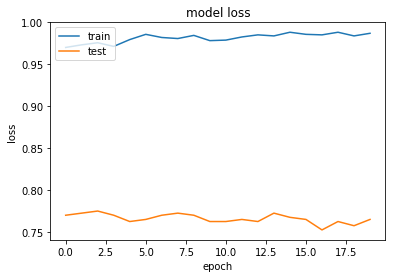

In [11]:
import pickle

with open('FNN_history.history', 'r') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 6. Specialized Layers

We have not been improved a lot the results of our basic SVM (Does it mean that the SVM is too good or the ANN too bad?). It is time to introduce more powerful layers, layers specialized in image classification. These layers are known as _convolutional layers_. Nets using these layers are called _convolutional neural nets_ (CNNs).

<table align='left'>
<tr>
<td></td>
<td><img src='figs/convolution.gif' alt="Drawing" style="width: 300px;"/></td>
<td><img src='figs/convolution_numerical.gif' alt="Drawing" style="width: 400px;"/></td>
</tr>
</table>

Convolutional layers receive as input an image $X \in \mathbb{R}^{IST}$ of $I$ input channels $X_i \in \mathbb{R}^{ST}$, and compute as output a new image $Y$, composed of $J$ output channels $Y_j \in \mathbb{R}^{UV}$ known as \emph{feature maps}, by performing an operation of the form

\begin{align}
Y_j = g\left(\sum\nolimits_{i} X_i \ast W_{ji} + {b}_j \right) \in \mathbb{R}^{UV},\, \forall j \ ,
\end{align} 

where $\ast$ denotes the ($2$-dimensional) convolution operation 

\begin{align}\label{eq:convolution}
X_i \ast W_{ji}[u,v]  = \sum_{p=0}^{P-1}\sum_{q=0}^{Q-1} X_i[u+p,v+q] W_{ji}[P-p,Q-q] \ ,
\end{align}

$g(\cdot)$ is a point-wise non-linear function and $W_{ji} \in \mathbb{R}^{PQ}$, ${b} \in \mathbb{R}^{J}$ are trainable parameters. The matrix $W_{ji}$,  defining the interaction between the $j$-th output channel and the $i$-th input channel, parametrises a $P\times Q$ spatial filter implemented by the higher layer to detect or enhance some feature in the incoming image. 


Convolutions have been long used in computer vision to implement useful transformations of images. 

<table align='left'>
<tr>
<td></td>
<td><img src='figs/sobel1.pdf' alt="Drawing" style="width: 500px;"/></td>
<td><img src='figs/sobel2.pdf' alt="Drawing" style="width: 500px;"/></td>
</tr>
</table>


The only difference is that in neural networks the parameters of the operation are learn from data and thus determined automatically to improve in a given task.

<img src='figs/learnable_filters.pdf' alt="Drawing" style="width: 700px;"/>

A second type of computation introduced by CNNs is _pooling_. Broadly speaking, pooling layers of a CNN implement a spatial dimensionality reduction operation designed to (i) drastically reduce the number of free parameters of the next layer, (ii) make the representation learn by the model more invariant to distortions and (iii) allow the higher layers of the model to focus on greater areas of the input image. Given an input volume pooling layers substitute a patch of pixels in the incoming image by a single representative value.

<img src='figs/maxpool2.jpg' alt="Drawing" style="width: 600px;"/>

## 7. Creating and Training a Convolutional Neural Net

<img src='figs/pastanet.pdf' alt="Drawing" style="width: 600px;"/>

In [12]:
X = np.array(all_imgs)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(target_w, target_h, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(10))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 32
n_epochs = 10

history = model.fit(X_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2,validation_data=(X_test, Y_test))


with open('CNN_history.history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(2000, 65, 65, 3)
(2000,)
Train on 1600 samples, validate on 400 samples
Epoch 1/10
 - 22s - loss: 0.6061 - acc: 0.6587 - val_loss: 0.4679 - val_acc: 0.8025
Epoch 2/10
 - 20s - loss: 0.4504 - acc: 0.7969 - val_loss: 0.4404 - val_acc: 0.8275
Epoch 3/10
 - 21s - loss: 0.4109 - acc: 0.8231 - val_loss: 0.4257 - val_acc: 0.8275
Epoch 4/10
 - 20s - loss: 0.3724 - acc: 0.8406 - val_loss: 0.4489 - val_acc: 0.8175
Epoch 5/10
 - 20s - loss: 0.3350 - acc: 0.8612 - val_loss: 0.4788 - val_acc: 0.8000
Epoch 6/10
 - 19s - loss: 0.3392 - acc: 0.8550 - val_loss: 0.4805 - val_acc: 0.8125
Epoch 7/10
 - 19s - loss: 0.2898 - acc: 0.8844 - val_loss: 0.4885 - val_acc: 0.7975
Epoch 8/10
 - 19s - loss: 0.2664 - acc: 0.8912 - val_loss: 0.4612 - val_acc: 0.8050
Epoch 9/10


KeyboardInterrupt: 

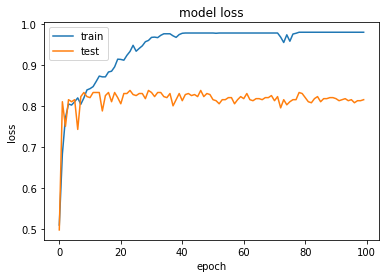

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam, Adagrad
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pickle

with open('CNN_history.history', 'r') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 8. Using Pre-trained Nets

<table align='left'>
<tr>
<td></td>
<td><img src='figs/vgg16.png' alt="Drawing" style="width: 300px;"/></td>
<td><img src='figs/imagenet_small.png' alt="Drawing" style="width: 300px;"/></td>
</tr>
</table>
¡


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imresize as resize

root_dir = 'food/'
ragu_dir = 'spaghetti_bolognese/'
carbonara_dir = 'spaghetti_carbonara/'
lasagna_dir = 'lasagna/'

all_ragu = os.listdir(os.path.join(root_dir, ragu_dir))
all_carbonara = os.listdir(os.path.join(root_dir, carbonara_dir))
#all_lasagna = os.listdir(os.path.join(root_dir, lasagna_dir))

import matplotlib.image as img
#from skimage.transform import resize

target_w = 299
target_h = 299
all_imgs_orig = []
all_imgs = []
all_labels = []
idx = 0    
min_side = 400
resize_count = 0

for img_name in all_ragu:
    img_arr = img.imread(os.path.join(root_dir, ragu_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(1)

for img_name in all_carbonara:
    img_arr = img.imread(os.path.join(root_dir, carbonara_dir, img_name))
    w,h,d = img_arr.shape
    img_arr_rs = img_arr
    img_arr_rs = resize(img_arr, (target_w, target_h))
    all_imgs.append(img_arr_rs)
    all_imgs_orig.append(img_arr)
    all_labels.append(0)

# for img_name in all_lasagna:
#     img_arr = img.imread(os.path.join(root_dir, lasagna_dir, img_name))
#     w,h,d = img_arr.shape
#     img_arr_rs = img_arr
#     img_arr_rs = resize(img_arr, (target_w, target_h))
#     all_imgs.append(img_arr_rs)
#     all_imgs_orig.append(img_arr)
#     all_labels.append(2)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense, Concatenate
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split


X = np.array(all_imgs, dtype=np.float32)
Y = to_categorical(np.array(all_labels),num_classes=2)
Y = Y[:,0]
print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


from vgg16 import VGG16
from keras.preprocessing import image
from imagenet_utils import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

X = preprocess_input(X)
print(X.shape)

features = model.predict(X)

#np.save("pasta_features",features)

print(features.shape)
print(type(features))

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(9,9,512)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))
optimizer = Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

batch_size = 32
n_epochs = 200

features_train, features_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.2, random_state=42)

history = model.fit(features_train,Y_train,epochs=n_epochs,batch_size=batch_size,verbose=2, validation_data=(features_test, Y_test))


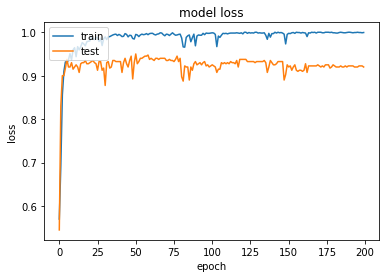

In [16]:
import pickle

with open('VGG16_based_history.history', 'r') as file_pi:
    history = pickle.load(file_pi)

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()